<style>
    h1 {
      color: #0078d4
    }
</style>
<h1>Image classification for bone fractures</h1>

<p>The goal of this project is to classify images of different bone fractures into different categories.
Data set that will be used in this project contains 1130 images of 10 different types of bone
brakes such as <i>avulsion fractures, comminuted fractures, fracture-dislocations, greenstick
fractures, hairline fractures, impacted fractures, longitudinal fractures, oblique fractures,
pathological fractures, and spiral fractures</i>. By using machine learning algorithms, it will be
possible to predict types of a specific bone break which theoretically could lead to patients getting better
treatment and improve their health outcomes. </p>

<style>
    h4 {
        color:rgb(0, 212, 184)
    }
</style>
<h4>Dataset Information</h4>
<ul>
    <li><strong>Name:</strong> Bone Break Classification Dataset</li>
    <li><strong>Type:</strong> Open Source Dataset</li>
    <li><strong>Author:</strong> Curso</li>
    <li><strong>Source:</strong> 
      <a href="https://universe.roboflow.com/curso-rphcb/bone-break-classification" target="_blank">Roboflow Universe</a>
    </li>
    <li><strong>Publisher:</strong> Roboflow</li>
    <li><strong>Published:</strong> February 2024</li>
    <li><strong>License:</strong> Creative Commons Attribution 4.0 (CC BY 4.0)</li>
    <li><strong>Note:</strong> Visited on 29.11.2024.</li>
    <li><strong>Acquired from:</strong> 
      <a href="https://www.kaggle.com/datasets/pkdarabi/bone-break-classification-image-dataset/data" target="_blank">Kaggle</a>
    </li>
</ul>


<h4>Leading images</h4>

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = r"Bone Break Classification"

#creating image generator
img_generator = ImageDataGenerator(rescale=1/255)

images_labels = img_generator.flow_from_directory(
    path, #getting images from the "path"
    target_size=(150, 150), #changing resolution
    batch_size=10,
    class_mode='categorical'
)

Found 1129 images belonging to 10 classes.


In [12]:
#displaying image labels
print(images_labels.class_indices)

{'Avulsion fracture': 0, 'Comminuted fracture': 1, 'Fracture Dislocation': 2, 'Greenstick fracture': 3, 'Hairline Fracture': 4, 'Impacted fracture': 5, 'Longitudinal fracture': 6, 'Oblique fracture': 7, 'Pathological fracture': 8, 'Spiral Fracture': 9}


In [15]:
#printing number of images per each class
for class_name, class_index in images_labels.class_indices.items():
    class_count = sum([1 for label in images_labels.labels if label == class_index])
    print(f"{class_name}: {class_count} images")

Avulsion fracture: 123 images
Comminuted fracture: 148 images
Fracture Dislocation: 156 images
Greenstick fracture: 122 images
Hairline Fracture: 111 images
Impacted fracture: 84 images
Longitudinal fracture: 80 images
Oblique fracture: 85 images
Pathological fracture: 134 images
Spiral Fracture: 86 images


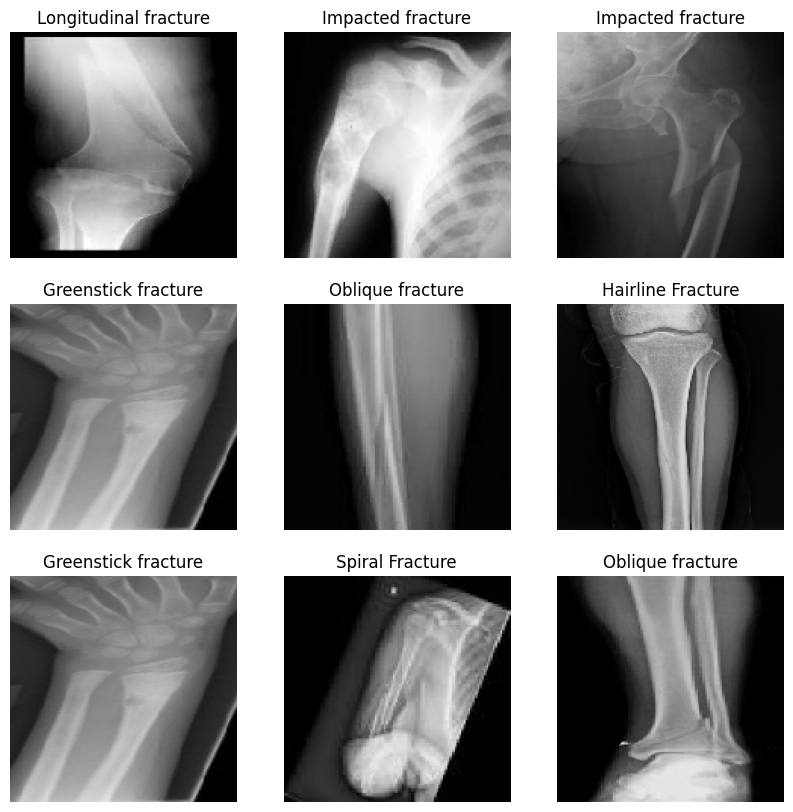

In [37]:
import matplotlib.pyplot as plt
import numpy as np

#getting names of classes, labels; they are saved as binary
img_labels = list(images_labels.class_indices.keys())

#creating a plot
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

#making 3x3 grid of images by making a loop
for i in range(3):
    for j in range(3):
        random_index = np.random.randint(0, 100) #getting random index
        image, label = images_labels[random_index] #getting image and label from that index
        #converting binary values for labels to text names
        class_index = label.argmax()  #getting the index
        img_class = img_labels[class_index]  #mapping class name and index
        #displaying image and its class
        ax[i, j].imshow(image[0])
        ax[i, j].set_title(img_class)  # Display the class name
        ax[i, j].axis("off") #removing axes
plt.show()